In [1]:
# RTEM APIs
import requests
import pytz

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,9)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

from IPython.display import display

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rtemqueries/rtem_2018_westchester_outside_air_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2019_new_york_outside_air_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2021_kings_real_power_time_series.csv
/kaggle/input/rtemqueries/rtem_2021_new_york_outside_air_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_outside_air_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2019_bronx_virtual_time_series.csv
/kaggle/input/rtemqueries/rtem_2020_new_york_outside_air_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2020_new_york_zone_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2020_queens_zone_temp_time_series.csv
/kaggle/input/rtemqueries/rtem_2021_bronx_virtual_time_series.csv
/kaggle/input/rtemqueries/rtem_2018_new_york_virtual_time_series.csv
/kaggle/input/rtemqueries/rtem_2020_new_york_real_power_time_series.csv
/kaggle/input/rtemqueries/rtem_2020_bronx_virtual_time_series.csv
/kaggle/input/rtemqueries/rtem_2021_new_york_real_power_time_series.csv
/

In [2]:
ny_2020 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2020_new_york_zone_temp_time_series.csv')

# queens_2021 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2021_queens_zone_temp_time_series.csv')
# queens_2020 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2020_queens_zone_temp_time_series.csv')
# queens_2019 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2019_queens_zone_temp_time_series.csv')
# queens_2018 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2018_queens_zone_temp_time_series.csv')


# bronx_2020 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2020_bronx_zone_temp_time_series.csv')
# bronx_2019 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2019_bronx_zone_temp_time_series.csv')
# bronx_2018 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2018_bronx_zone_temp_time_series.csv')


# kings_2020 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2020_kings_zone_temp_time_series.csv')
# kings_2019 = pd.read_csv('/kaggle/input/rtemqueries/rtem_2019_kings_zone_temp_time_series.csv')


# building 426 - Hospitality - New York County
co2_outside = pd.read_csv('/kaggle/input/co2-outside/co2_outside_time_series.csv')
co2_inside = pd.read_csv('/kaggle/input/co2-inside/co2_zone_time_series.csv')
hp_zone_temp = pd.read_csv('/kaggle/input/heat-pump-zone-temp/heat_pump_zone_temp_hospitality_time_series.csv')


In [3]:
metadata = pd.read_csv('../input/rtem-preprocessed/metadata-2.csv')

# `2020 New York`

In [4]:
data = ny_2020

data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
data.resample('D', on="timestamp").mean()

cols = data.columns[1:]
cols

# for col in cols:
#     sns.lineplot(data=data, x="timestamp", y=col)

# plt.legend([],[], frameon=False)
# plt.show()

Index(['204984', '204985', '217158', '217159', '217156', '217157', '217154',
       '217155', '217152', '217153',
       ...
       '204994', '204995', '204992', '204993', '204990', '204991', '204988',
       '204989', '204986', '204987'],
      dtype='object', length=120)

In [5]:
melted_data = data.melt(id_vars="timestamp", var_name="sensor", value_name="temperature")
melted_data

,timestamp,sensor,temperature
0,2020-01-01 00:01:00+00:00,204984,NaN
1,2020-01-01 00:01:20+00:00,204984,NaN
2,2020-01-01 00:02:00+00:00,204984,NaN
3,2020-01-01 00:02:59+00:00,204984,NaN
4,2020-01-01 00:03:00+00:00,204984,NaN
...,...,...,...
29825875,2020-09-01 03:45:00+00:00,204987,NaN
29825876,2020-09-01 03:50:00+00:00,204987,NaN
29825877,2020-09-01 03:55:00+00:00,204987,NaN
29825878,2020-09-01 04:00:00+00:00,204987,NaN


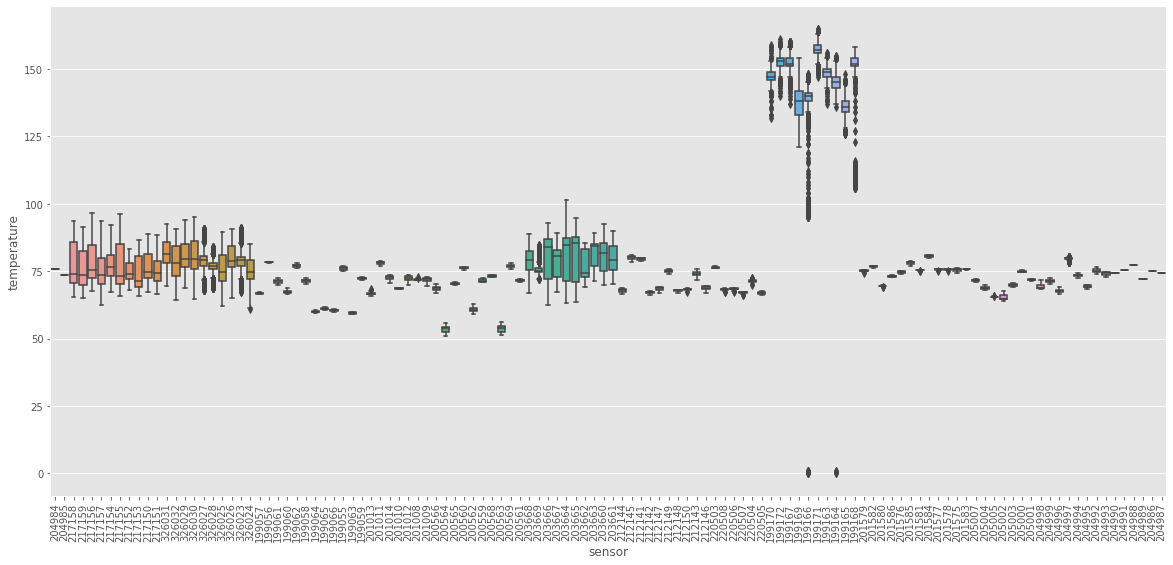

In [6]:
fig = sns.boxplot(y="temperature", x="sensor", data=melted_data)
labels = plt.xticks(rotation=90)

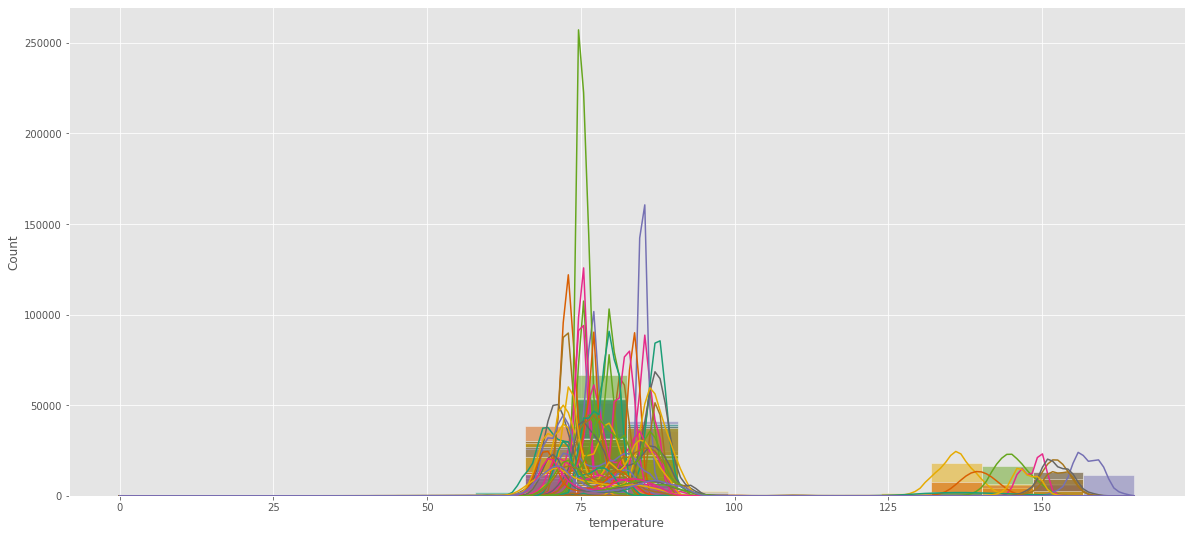

In [7]:
fig = sns.histplot(data=melted_data, x="temperature", hue="sensor", bins=20, kde=True, palette="Dark2")

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

In [8]:
stats_data = data.describe()
stats_data


,204984,204985,217158,217159,217156,217157,217154,217155,217152,217153,...,204994,204995,204992,204993,204990,204991,204988,204989,204986,204987
count,1.900000e+01,19.000000,23327.000000,23326.000000,23327.000000,23327.000000,23326.000000,23327.000000,23326.000000,23326.000000,...,299.000000,19.000000,299.000000,299.000000,19.000000,19.0,19.000000,1.900000e+01,1.900000e+01,1.900000e+01
mean,7.576250e+01,73.400002,77.703549,76.094983,78.458086,75.159193,77.107637,77.332763,74.855901,74.405713,...,73.347323,69.290788,75.123617,74.092684,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01
std,1.460027e-14,0.000000,8.173869,6.790799,6.988567,6.457884,4.825546,7.841809,3.383374,5.796342,...,0.438259,0.471916,0.770633,0.699583,0.000000,0.0,0.000000,1.460027e-14,1.460027e-14,1.460027e-14
min,7.576250e+01,73.400002,65.524994,64.962494,67.550003,62.487499,67.099998,65.637497,68.000000,65.862503,...,72.500000,68.449997,73.849998,72.724998,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01
25%,7.576250e+01,73.400002,70.699997,70.024994,72.612503,70.137497,73.062500,70.362503,72.050003,69.237503,...,73.062500,68.956245,74.524994,73.625000,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01
50%,7.576250e+01,73.400002,73.962494,73.625000,75.425003,73.625000,76.437500,73.287498,73.849998,71.487503,...,73.399994,69.237503,75.199997,74.187500,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01
75%,7.576250e+01,73.400002,85.887497,82.512497,84.649994,79.925003,80.824997,84.987503,77.899994,80.487503,...,73.625000,69.687500,75.649994,74.750000,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01
max,7.576250e+01,73.400002,93.537498,91.399994,96.687500,93.649994,92.300003,96.237495,83.300003,86.562500,...,74.187500,70.024994,76.662498,74.862503,74.400002,75.5,77.099998,7.220000e+01,7.520000e+01,7.420000e+01


In [9]:
stats_data = stats_data.T.reset_index().rename(columns={"index":"point_id"})
stats_data

,point_id,count,mean,std,min,25%,50%,75%,max
0,204984,19.0,75.762497,1.460027e-14,75.762497,75.762497,75.762497,75.762497,75.762497
1,204985,19.0,73.400002,0.000000e+00,73.400002,73.400002,73.400002,73.400002,73.400002
2,217158,23327.0,77.703549,8.173869e+00,65.524994,70.699997,73.962494,85.887497,93.537498
3,217159,23326.0,76.094983,6.790799e+00,64.962494,70.024994,73.625000,82.512497,91.399994
4,217156,23327.0,78.458086,6.988567e+00,67.550003,72.612503,75.425003,84.649994,96.687500
...,...,...,...,...,...,...,...,...,...
115,204991,19.0,75.500000,0.000000e+00,75.500000,75.500000,75.500000,75.500000,75.500000
116,204988,19.0,77.099998,0.000000e+00,77.099998,77.099998,77.099998,77.099998,77.099998
117,204989,19.0,72.199997,1.460027e-14,72.199997,72.199997,72.199997,72.199997,72.199997
118,204986,19.0,75.199997,1.460027e-14,75.199997,75.199997,75.199997,75.199997,75.199997


In [10]:
metadata['point_id'] = metadata['point_id'].astype(str)

In [11]:
stats_merged = pd.merge(stats_data, metadata, how="left", on="point_id")
stats_merged.head()

,point_id,count,mean,std,min,25%,50%,75%,max,building_id,...,equip_id,building_name,equip_count,point_count,sq_ft,city,building_type,equip_type_abbr,equip_type_name,equip_tags
0,204984,19.0,75.762497,1.460027e-14,75.762497,75.762497,75.762497,75.762497,75.762497,214,...,36558,97593,4,72,12000.0,New York,Multifamily,SITE,Site Sensors,['site']
1,204985,19.0,73.400002,0.000000e+00,73.400002,73.400002,73.400002,73.400002,73.400002,214,...,36558,97593,4,72,12000.0,New York,Multifamily,SITE,Site Sensors,['site']
2,217158,23327.0,77.703549,8.173869e+00,65.524994,70.699997,73.962494,85.887497,93.537498,317,...,34990,128286,2,38,35000.0,New York,Multifamily,SITE,Site Sensors,['site']
3,217159,23326.0,76.094983,6.790799e+00,64.962494,70.024994,73.625000,82.512497,91.399994,317,...,34990,128286,2,38,35000.0,New York,Multifamily,SITE,Site Sensors,['site']
4,217156,23327.0,78.458086,6.988567e+00,67.550003,72.612503,75.425003,84.649994,96.687500,317,...,34990,128286,2,38,35000.0,New York,Multifamily,SITE,Site Sensors,['site']


In [12]:
metadata.T

,0,1,2,3,4,5,6,7,8,9,...,44332,44333,44334,44335,44336,44337,44338,44339,44340,44341
point_id,310029,310009,310010,310011,310012,310013,310014,310015,310016,310017,...,231135,231134,231133,231132,231131,359906,359905,231120,231119,231118
building_id,441,441,441,441,441,441,441,441,441,441,...,399,399,399,399,399,399,399,399,399,399
last_updated,2019-06-15 04:00:00+00:00,2019-06-14 04:05:00+00:00,2019-06-15 04:00:00+00:00,2019-06-14 04:05:00+00:00,2019-06-14 04:05:00+00:00,2019-06-14 04:05:00+00:00,2019-06-14 04:05:00+00:00,2019-06-14 04:05:00+00:00,2019-02-18 22:20:00+00:00,2019-06-14 04:05:00+00:00,...,2020-08-01 03:45:00+00:00,2020-08-01 03:45:00+00:00,2020-08-01 03:45:00+00:00,2019-06-01 03:45:00+00:00,2019-06-01 03:45:00+00:00,2020-08-01 03:45:00+00:00,2020-05-15 08:45:00+00:00,2018-12-01 04:45:00+00:00,2019-06-01 03:45:00+00:00,2019-03-15 08:45:00+00:00
first_updated,2019-02-19 02:01:01+00:00,2019-02-20 22:15:00+00:00,2019-02-18 15:29:35+00:00,2019-02-18 15:30:00+00:00,2019-02-18 15:30:00+00:00,2019-02-18 15:35:00+00:00,2019-02-18 15:35:00+00:00,2019-02-18 15:35:00+00:00,2019-02-18 15:35:00+00:00,2019-02-18 15:35:00+00:00,...,2018-06-18 15:30:00+00:00,2018-12-01 05:00:00+00:00,2018-06-18 15:30:00+00:00,2018-12-01 05:00:00+00:00,2018-06-01 04:00:00+00:00,2020-02-01 05:00:00+00:00,2020-02-01 05:00:00+00:00,2018-06-13 17:00:00+00:00,2018-12-01 05:00:00+00:00,2018-12-31 05:00:00+00:00
point_name,245 E 149th St. Boiler-1 Fault Code,225 E 149th St. Boiler-1 Exhaust Temp,225 E 149th St. Boiler-1 Fault Code,225 E 149th St. Boiler-1 FFWD Temp,225 E 149th St. Boiler-1 Fire Rate In,225 E 149th St. Boiler-1 Fire Rate Out,225 E 149th St. Boiler-1 Flame Strength,225 E 149th St. Boiler-1 Inlet Temp,225 E 149th St. Boiler-1 Net Remote Setpt,225 E 149th St. Boiler-1 Outlet Temp,...,CWST_value,CWRT_status,CWRT_value,CWP Power_status,CWP Power_value,Main Meter kW_v1,Main Meter kW_v0,Building Demand_value,Building Demand_v1,Building Demand_v0
point_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CWST_value,CWRT_status,CWRT_value,CWP Power_status,CWP Power_value,NaN,NaN,Building Demand_value,Building Demand_v1,Building Demand_v0
tagged_units,?,f,?,?,?,?,?,?,?,?,...,f,?,f,?,kw,kw,kw,?,?,?
point_value,0,183.55,0,46.90,91,43,100,43.45,175.02,50.59,...,0,down,0,ok,0,114.08,86.69,108.71,97.55,84.67
point_type,Virtual,Exhaust Air Temperature,Virtual,Virtual,Virtual,Virtual,Virtual,Virtual,Virtual,Virtual,...,Condenser Water Supply Temperature,Virtual,Condenser Water Return Temperature,Virtual,Real Power,Real Power,Real Power,Virtual,Virtual,Virtual
point_type_id,434,86,434,434,434,434,434,434,434,434,...,392,434,388,434,221,221,221,434,434,434


In [13]:
stats_merged[stats_merged.point_id=='217159']

,point_id,count,mean,std,min,25%,50%,75%,max,building_id,...,equip_id,building_name,equip_count,point_count,sq_ft,city,building_type,equip_type_abbr,equip_type_name,equip_tags
3,217159,23326.0,76.094983,6.790799,64.962494,70.024994,73.625,82.512497,91.399994,317,...,34990,128286,2,38,35000.0,New York,Multifamily,SITE,Site Sensors,['site']


## `New York - 2020 - Multifamily - Zone Temperatrue - By Building_ID`

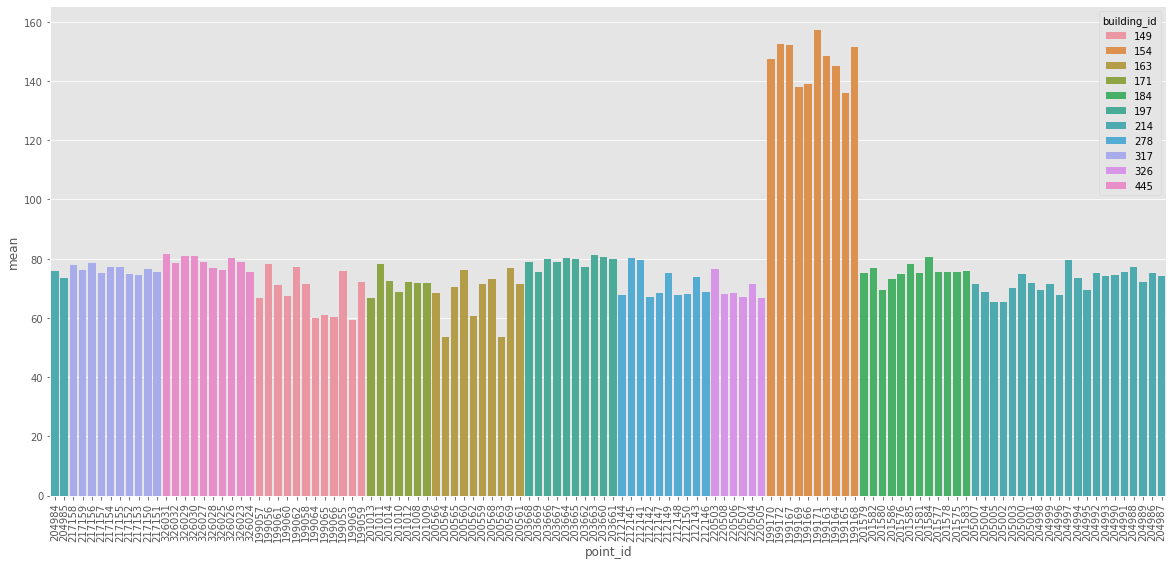

In [14]:
fig = sns.barplot(data=stats_merged, x="point_id", y="mean", hue="building_id", dodge=False)
labels = plt.xticks(rotation=90)

### `New York - 2020 - Multifamily - Zone Temperautre (Annual Mean) - By Building ID`



In [15]:
annual_temp = stats_merged.groupby('building_id').mean().astype(int)[['mean','equip_count','point_count','sq_ft']].rename(columns={'mean':'annual_mean_temp'})
annual_temp.to_csv('new_york_county_stats_per_building.csv')
annual_temp

,annual_mean_temp,equip_count,point_count,sq_ft
building_id,,,,
149,68,3,37,31152
154,146,8,26,357297
163,67,3,31,20000
171,71,3,32,23400
184,75,3,34,52782
197,79,2,38,75165
214,72,4,72,12000
278,71,5,38,31220
317,76,2,38,35000


# **`Time Series - Zone Temp`**

In [16]:
data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

In [17]:
data_day = data.resample('1D', on="timestamp").mean()
data_day.head()

,204984,204985,217158,217159,217156,217157,217154,217155,217152,217153,...,204994,204995,204992,204993,204990,204991,204988,204989,204986,204987
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,75.762497,73.400002,68.521051,67.520394,69.187761,66.655919,69.797630,69.595130,70.029735,69.532366,...,73.347323,69.290788,75.123617,74.092684,74.400002,75.5,77.099998,72.199997,75.199997,74.199997
2020-01-02 00:00:00+00:00,NaN,NaN,67.690624,69.692186,69.464842,67.009764,70.083592,69.456639,69.586718,69.862107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,69.101562,70.484373,70.580467,68.464061,72.122655,70.272264,70.446874,70.432811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,70.479685,70.595701,71.617577,69.754295,73.444530,71.771092,71.330467,71.187498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,69.699218,69.473045,69.531639,68.302342,73.255857,70.833592,71.023436,70.370702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_day.T

timestamp,2020-01-01 00:00:00+00:00,2020-01-02 00:00:00+00:00,2020-01-03 00:00:00+00:00,2020-01-04 00:00:00+00:00,2020-01-05 00:00:00+00:00,2020-01-06 00:00:00+00:00,2020-01-07 00:00:00+00:00,2020-01-08 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-01-10 00:00:00+00:00,...,2020-08-23 00:00:00+00:00,2020-08-24 00:00:00+00:00,2020-08-25 00:00:00+00:00,2020-08-26 00:00:00+00:00,2020-08-27 00:00:00+00:00,2020-08-28 00:00:00+00:00,2020-08-29 00:00:00+00:00,2020-08-30 00:00:00+00:00,2020-08-31 00:00:00+00:00,2020-09-01 00:00:00+00:00
204984,75.762497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204985,73.400002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217158,68.521051,67.690624,69.101562,70.479685,69.699218,69.408593,69.517577,69.093359,67.076561,67.742186,...,87.819920,89.221483,89.694353,87.020701,85.901561,86.351561,86.631640,83.888280,83.483983,NaN
217159,67.520394,69.692186,70.484373,70.595701,69.473045,69.599608,69.511717,70.316795,70.385936,71.319920,...,87.614842,85.988280,85.931047,83.544921,81.484764,82.738670,82.205467,81.564451,79.544139,NaN
217156,69.187761,69.464842,70.580467,71.617577,69.531639,69.501170,69.072264,69.074608,69.553906,68.732420,...,86.875389,90.844530,89.356854,86.325780,83.366796,86.816796,84.391014,83.291796,81.978124,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204991,75.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204988,77.099998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204989,72.199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204986,75.199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


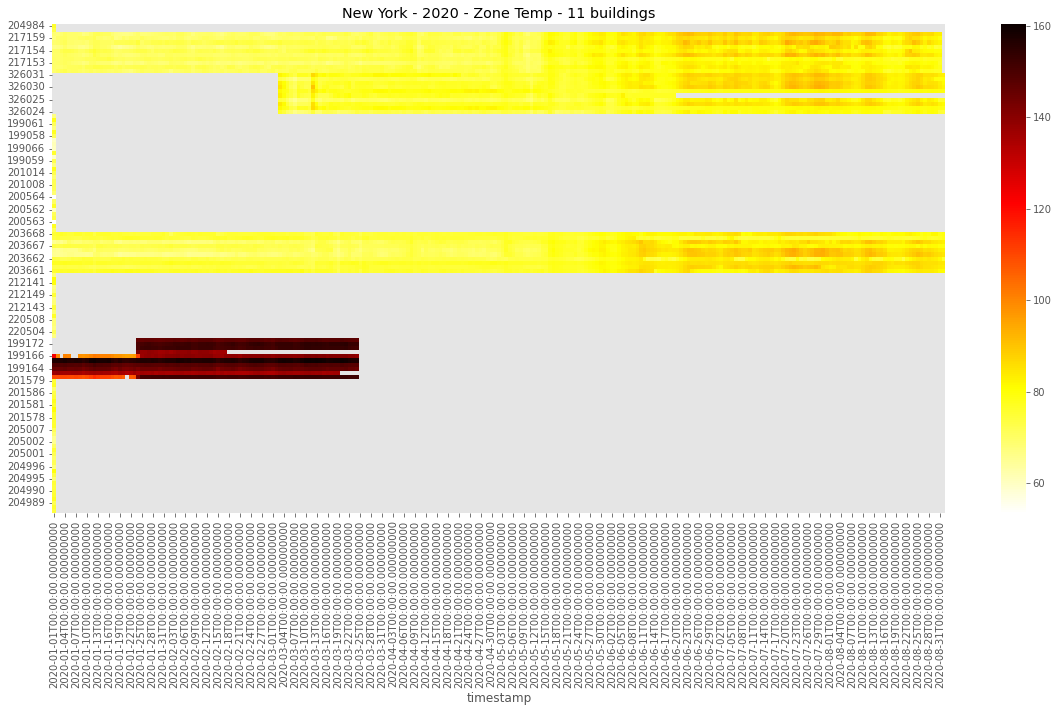

In [19]:
sns.heatmap(data_day.T, cmap="hot_r")
plt.title('New York - 2020 - Zone Temp - 11 buildings')
plt.show()

### `Export CSV`

In [20]:
data_day

,204984,204985,217158,217159,217156,217157,217154,217155,217152,217153,...,204994,204995,204992,204993,204990,204991,204988,204989,204986,204987
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,75.762497,73.400002,68.521051,67.520394,69.187761,66.655919,69.797630,69.595130,70.029735,69.532366,...,73.347323,69.290788,75.123617,74.092684,74.400002,75.5,77.099998,72.199997,75.199997,74.199997
2020-01-02 00:00:00+00:00,NaN,NaN,67.690624,69.692186,69.464842,67.009764,70.083592,69.456639,69.586718,69.862107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,69.101562,70.484373,70.580467,68.464061,72.122655,70.272264,70.446874,70.432811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,70.479685,70.595701,71.617577,69.754295,73.444530,71.771092,71.330467,71.187498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,69.699218,69.473045,69.531639,68.302342,73.255857,70.833592,71.023436,70.370702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 00:00:00+00:00,NaN,NaN,86.351561,82.738670,86.816796,77.207420,80.725389,84.906639,77.862499,80.366795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29 00:00:00+00:00,NaN,NaN,86.631640,82.205467,84.391014,78.692186,80.689061,85.070701,77.930467,80.863671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30 00:00:00+00:00,NaN,NaN,83.888280,81.564451,83.291796,74.972655,79.772655,82.642577,77.910546,80.133593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# `217159 (point_id), 317(building_id), new york, 2020, multifamily, zone_temp`
# missing data filled with previous value
zone_temp_time_series_new_york_bdg = data_day[['217159']].fillna(method='ffill').rename(columns={'217159':'zone_temp'})
zone_temp_time_series_new_york_bdg.to_csv('daily_zone_temp_new_york_multifamily_building_2020.csv')
zone_temp_time_series_new_york_bdg

,zone_temp
timestamp,
2020-01-01 00:00:00+00:00,67.520394
2020-01-02 00:00:00+00:00,69.692186
2020-01-03 00:00:00+00:00,70.484373
2020-01-04 00:00:00+00:00,70.595701
2020-01-05 00:00:00+00:00,69.473045
...,...
2020-08-28 00:00:00+00:00,82.738670
2020-08-29 00:00:00+00:00,82.205467
2020-08-30 00:00:00+00:00,81.564451


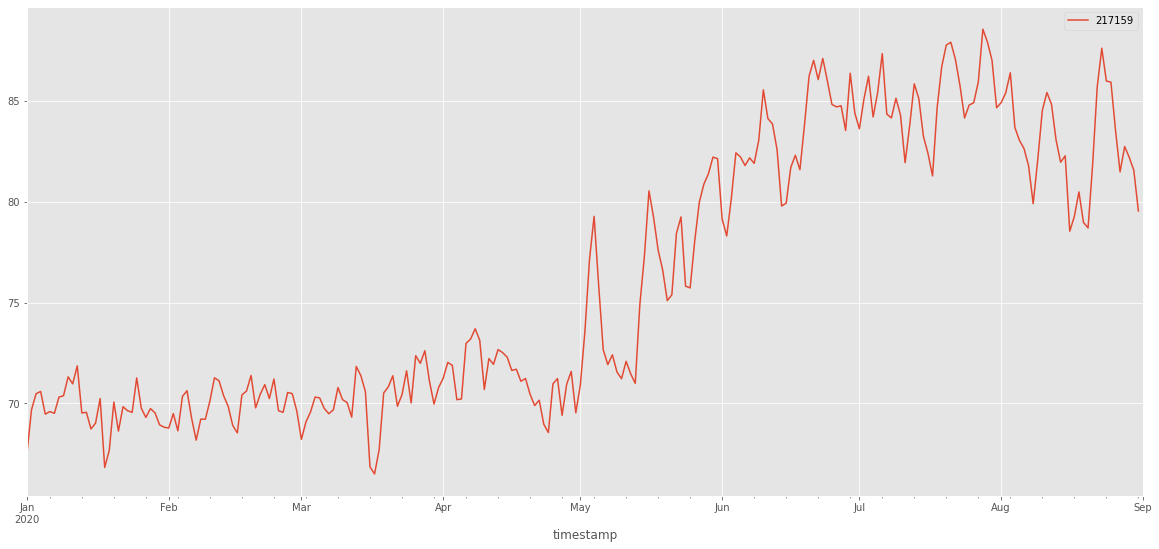

In [22]:
# selected zone temp point of a multifamilty building in new york county
data_day[['217159']].plot()
plt.show()

# **`Time Series - CO2 Outside - Hospitality`**

## `Hospitality`

In [23]:
data = co2_outside.copy()
data

,timestamp,283599
0,2017-12-01T05:00:00Z,11.36
1,2017-12-01T05:15:00Z,11.12
2,2017-12-01T05:30:00Z,10.99
3,2017-12-01T05:45:00Z,10.99
4,2017-12-01T06:00:00Z,11.14
...,...,...
68400,2020-12-01T03:45:00Z,208.79
68401,2020-12-01T04:00:00Z,208.79
68402,2020-12-01T04:15:00Z,208.76
68403,2020-12-01T04:30:00Z,209.16


In [24]:
data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

data_day = data.resample('1D', on="timestamp").mean()
# data_day.head()

data_day.T

timestamp,2017-12-01 00:00:00+00:00,2017-12-02 00:00:00+00:00,2017-12-03 00:00:00+00:00,2017-12-04 00:00:00+00:00,2017-12-05 00:00:00+00:00,2017-12-06 00:00:00+00:00,2017-12-07 00:00:00+00:00,2017-12-08 00:00:00+00:00,2017-12-09 00:00:00+00:00,2017-12-10 00:00:00+00:00,...,2020-11-22 00:00:00+00:00,2020-11-23 00:00:00+00:00,2020-11-24 00:00:00+00:00,2020-11-25 00:00:00+00:00,2020-11-26 00:00:00+00:00,2020-11-27 00:00:00+00:00,2020-11-28 00:00:00+00:00,2020-11-29 00:00:00+00:00,2020-11-30 00:00:00+00:00,2020-12-01 00:00:00+00:00
283599,12.006053,11.25875,10.991979,11.023333,11.592813,12.487292,11.985625,11.107083,11.061771,11.477604,...,222.743229,210.040104,227.590312,221.19375,209.202188,212.894271,223.240521,230.319479,215.219687,208.3505


In [25]:
# find building_id by point_id
metadata[metadata.point_id == '283599']

,point_id,building_id,last_updated,first_updated,point_name,point_description,tagged_units,point_value,point_type,point_type_id,...,equip_id,building_name,equip_count,point_count,sq_ft,city,building_type,equip_type_abbr,equip_type_name,equip_tags
4279,283599,426,2020-12-01 04:45:00+00:00,2017-12-01 05:00:00+00:00,480 W 42nd St - Signature Theatre GasDetection...,NaN,ppm,209.46,Outside Air Carbon Dioxide,118,...,26970,76513,92,959,80000.0,New York,Hospitality,SITE,Site Sensors,['site']


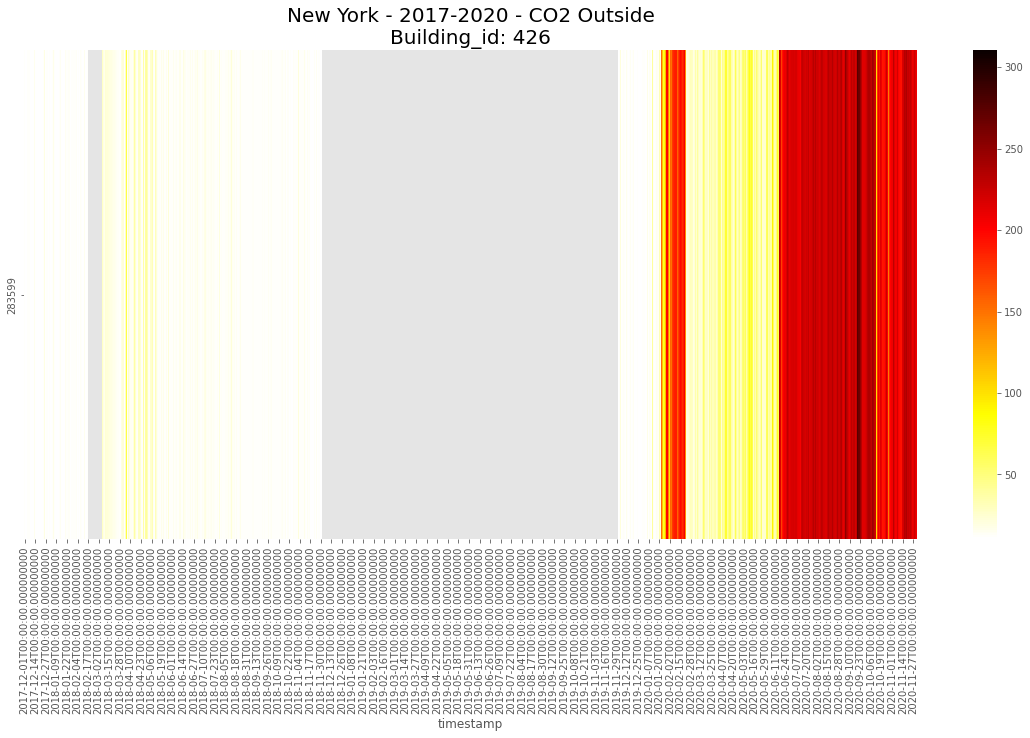

In [26]:
sns.heatmap(data_day.T, cmap="hot_r")
plt.title('New York - 2017-2020 - CO2 Outside\nBuilding_id: 426', size=20)
plt.show()

### `Export CSV`

In [27]:
# missing data filled with previous value
co2_outside_time_series_new_york_bdg = data_day[['283599']].fillna(method='ffill').rename(columns={'283599':'co2_outside'})
co2_outside_time_series_new_york_bdg.to_csv('daily_co2_outside_new_york_hospitality_building_2017_2020.csv')
co2_outside_time_series_new_york_bdg

,co2_outside
timestamp,
2017-12-01 00:00:00+00:00,12.006053
2017-12-02 00:00:00+00:00,11.258750
2017-12-03 00:00:00+00:00,10.991979
2017-12-04 00:00:00+00:00,11.023333
2017-12-05 00:00:00+00:00,11.592813
...,...
2020-11-27 00:00:00+00:00,212.894271
2020-11-28 00:00:00+00:00,223.240521
2020-11-29 00:00:00+00:00,230.319479


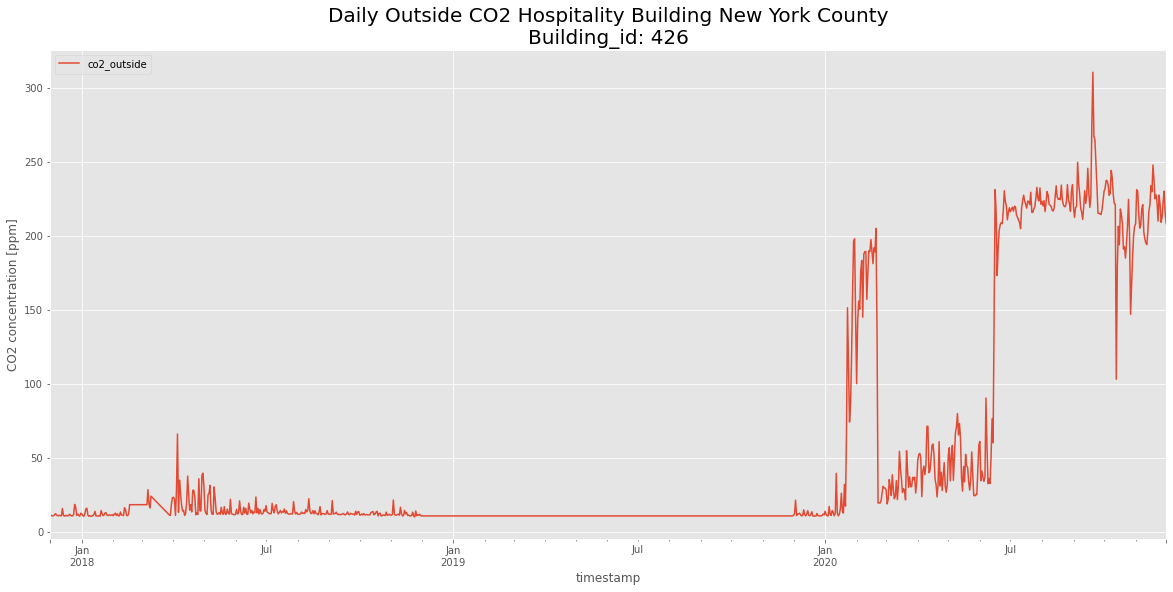

In [28]:
co2_outside_time_series_new_york_bdg.plot()
plt.title('Daily Outside CO2 Hospitality Building New York County\nBuilding_id: 426', size=20)
plt.ylabel('CO2 concentration [ppm]')
plt.show()

# **`Time Series - CO2 Inside - Hospitality`**

## `Hospitality`

In [29]:
data = co2_inside.copy()
data

,timestamp,283600
0,2017-12-01T05:00:00Z,716.94
1,2017-12-01T05:15:00Z,710.52
2,2017-12-01T05:30:00Z,707.37
3,2017-12-01T05:45:00Z,695.77
4,2017-12-01T06:00:00Z,686.88
...,...,...
68550,2020-12-01T03:45:00Z,409.42
68551,2020-12-01T04:00:00Z,408.78
68552,2020-12-01T04:15:00Z,409.78
68553,2020-12-01T04:30:00Z,408.17


In [30]:
data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

data_day = data.resample('1D', on="timestamp").mean()
# data_day.head()

data_day.T

timestamp,2017-12-01 00:00:00+00:00,2017-12-02 00:00:00+00:00,2017-12-03 00:00:00+00:00,2017-12-04 00:00:00+00:00,2017-12-05 00:00:00+00:00,2017-12-06 00:00:00+00:00,2017-12-07 00:00:00+00:00,2017-12-08 00:00:00+00:00,2017-12-09 00:00:00+00:00,2017-12-10 00:00:00+00:00,...,2020-11-22 00:00:00+00:00,2020-11-23 00:00:00+00:00,2020-11-24 00:00:00+00:00,2020-11-25 00:00:00+00:00,2020-11-26 00:00:00+00:00,2020-11-27 00:00:00+00:00,2020-11-28 00:00:00+00:00,2020-11-29 00:00:00+00:00,2020-11-30 00:00:00+00:00,2020-12-01 00:00:00+00:00
283600,670.899079,756.156875,780.502813,746.925625,653.696875,681.134688,664.244792,678.003333,685.368437,679.19875,...,428.069167,420.608646,423.391979,440.420938,430.963958,434.039375,419.540104,418.569271,414.991979,406.7525


In [31]:
metadata[metadata.point_id == '283600']

,point_id,building_id,last_updated,first_updated,point_name,point_description,tagged_units,point_value,point_type,point_type_id,...,equip_id,building_name,equip_count,point_count,sq_ft,city,building_type,equip_type_abbr,equip_type_name,equip_tags
4278,283600,426,2020-12-01 04:45:00+00:00,2017-12-01 05:00:00+00:00,480 W 42nd St - Signature Theatre HWCoil SpaceCO2,NaN,ppm,408.57,Zone Carbon Dioxide,119,...,26970,76513,92,959,80000.0,New York,Hospitality,SITE,Site Sensors,['site']


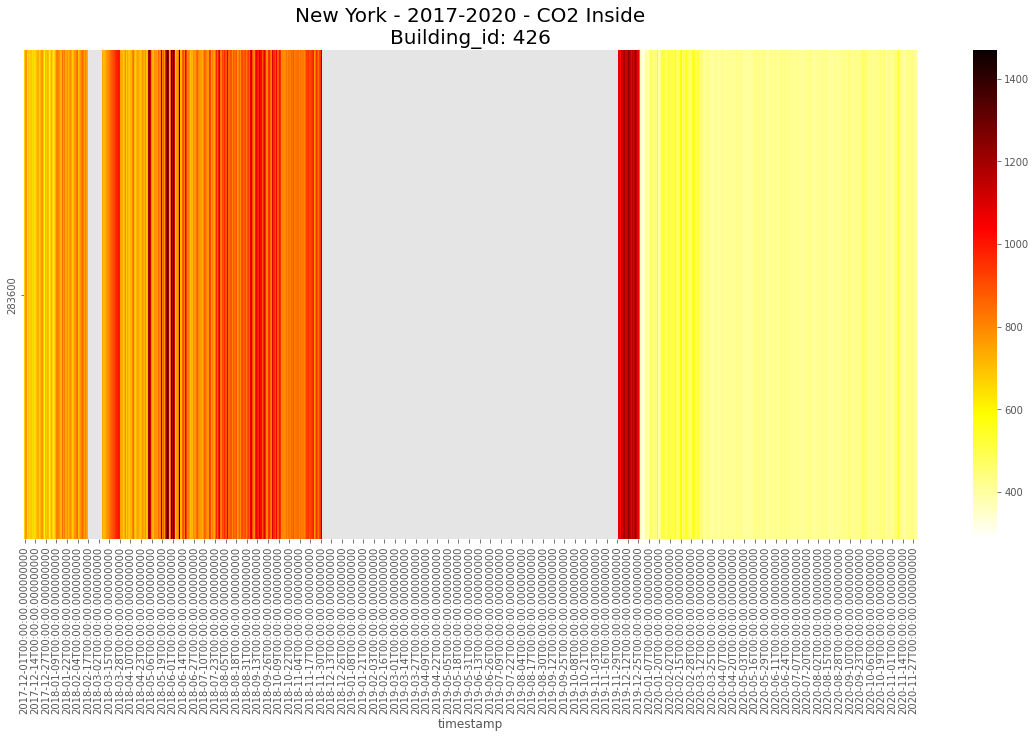

In [32]:
sns.heatmap(data_day.T, cmap="hot_r")
plt.title('New York - 2017-2020 - CO2 Inside\nBuilding_id: 426', size=20)
plt.show()

### `Export CSV`

In [33]:
# missing data filled with previous value
co2_inside_time_series_new_york_bdg = data_day[['283600']].fillna(method='ffill').rename(columns={'283600':'co2_inside'})
co2_inside_time_series_new_york_bdg.to_csv('daily_co2_inside_new_york_hospitality_building_2017_2020.csv')
co2_inside_time_series_new_york_bdg

,co2_inside
timestamp,
2017-12-01 00:00:00+00:00,670.899079
2017-12-02 00:00:00+00:00,756.156875
2017-12-03 00:00:00+00:00,780.502813
2017-12-04 00:00:00+00:00,746.925625
2017-12-05 00:00:00+00:00,653.696875
...,...
2020-11-27 00:00:00+00:00,434.039375
2020-11-28 00:00:00+00:00,419.540104
2020-11-29 00:00:00+00:00,418.569271


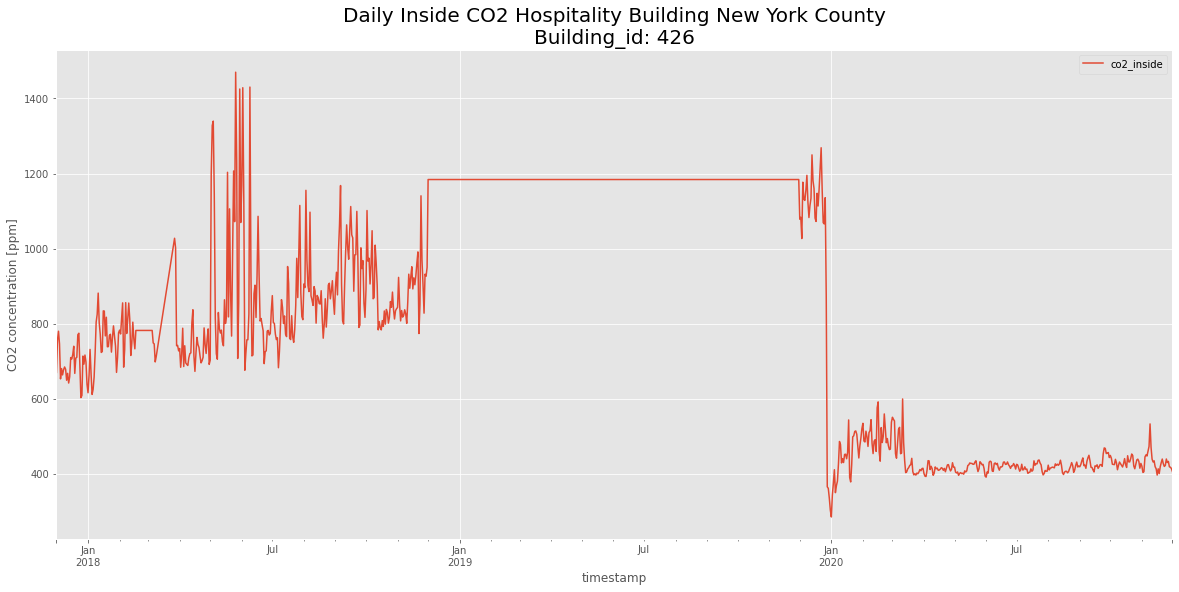

In [34]:
co2_inside_time_series_new_york_bdg.plot()
plt.title('Daily Inside CO2 Hospitality Building New York County\nBuilding_id: 426', size=20)
plt.ylabel('CO2 concentration [ppm]')
plt.show()

In [35]:
co2_all = pd.merge(co2_inside_time_series_new_york_bdg, co2_outside_time_series_new_york_bdg, how='outer', on='timestamp')
co2_all

,co2_inside,co2_outside
timestamp,,
2017-12-01 00:00:00+00:00,670.899079,12.006053
2017-12-02 00:00:00+00:00,756.156875,11.258750
2017-12-03 00:00:00+00:00,780.502813,10.991979
2017-12-04 00:00:00+00:00,746.925625,11.023333
2017-12-05 00:00:00+00:00,653.696875,11.592813
...,...,...
2020-11-27 00:00:00+00:00,434.039375,212.894271
2020-11-28 00:00:00+00:00,419.540104,223.240521
2020-11-29 00:00:00+00:00,418.569271,230.319479


# **`Time Series - Heat Pump Zone Temp - Hospitality`**

In [36]:
# point_id(283383), building_id(426), 480 W 42nd St - Signature Theatre, Heat Pump, Space Heating

## `Hospitality`

In [37]:
data = hp_zone_temp.copy()
data

,timestamp,283383
0,2017-12-01T05:00:00Z,73.53
1,2017-12-01T05:15:00Z,73.35
2,2017-12-01T05:30:00Z,73.15
3,2017-12-01T05:45:00Z,72.85
4,2017-12-01T06:00:00Z,72.76
...,...,...
68408,2020-12-01T03:45:00Z,71.62
68409,2020-12-01T04:00:00Z,71.52
68410,2020-12-01T04:15:00Z,71.39
68411,2020-12-01T04:30:00Z,71.35


In [38]:
data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

data_day = data.resample('1D', on="timestamp").mean()
# data_day.head()

data_day.T

timestamp,2017-12-01 00:00:00+00:00,2017-12-02 00:00:00+00:00,2017-12-03 00:00:00+00:00,2017-12-04 00:00:00+00:00,2017-12-05 00:00:00+00:00,2017-12-06 00:00:00+00:00,2017-12-07 00:00:00+00:00,2017-12-08 00:00:00+00:00,2017-12-09 00:00:00+00:00,2017-12-10 00:00:00+00:00,...,2020-11-22 00:00:00+00:00,2020-11-23 00:00:00+00:00,2020-11-24 00:00:00+00:00,2020-11-25 00:00:00+00:00,2020-11-26 00:00:00+00:00,2020-11-27 00:00:00+00:00,2020-11-28 00:00:00+00:00,2020-11-29 00:00:00+00:00,2020-11-30 00:00:00+00:00,2020-12-01 00:00:00+00:00
283383,72.170658,71.486354,71.994271,72.161979,73.316563,72.696562,72.347396,71.219896,71.553125,70.576146,...,65.388437,68.794583,68.17625,68.454687,70.517083,70.599167,68.348333,65.477187,68.600938,72.1005


In [39]:
metadata[(metadata.building_id == 426) & (metadata.point_type == 'Zone Temperature') & (metadata.equip_type_name == 'Heat Pump')]

,point_id,building_id,last_updated,first_updated,point_name,point_description,tagged_units,point_value,point_type,point_type_id,...,equip_id,building_name,equip_count,point_count,sq_ft,city,building_type,equip_type_abbr,equip_type_name,equip_tags
4030,283383,426,2020-12-01 04:45:00+00:00,2017-12-01 05:00:00+00:00,480 W 42nd St - Signature Theatre WSHP5 Space ...,NaN,f,71.32,Zone Temperature,77,...,26958,76513,92,959,80000.0,New York,Hospitality,HP,Heat Pump,"['dxCooling', 'dxHeating', 'heatPump', 'hvac']"


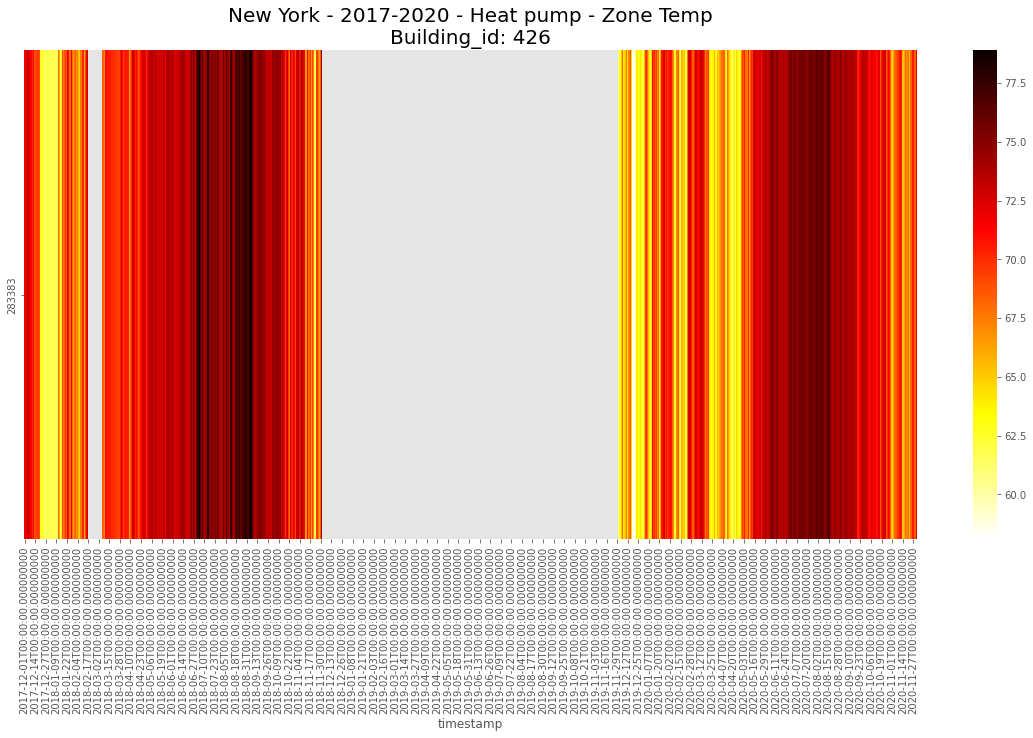

In [40]:
sns.heatmap(data_day.T, cmap="hot_r")
plt.title('New York - 2017-2020 - Heat pump - Zone Temp\nBuilding_id: 426', size=20)
plt.show()

### `Export CSV`

In [41]:
# missing data filled with previous value
hp_zone_temp_time_series_new_york_bdg = data_day[['283383']].fillna(method='ffill').rename(columns={'283383':'heat_pump_zone_temp'})
hp_zone_temp_time_series_new_york_bdg.to_csv('daily_heat_pump_zone_temp_new_york_hospitality_building_2017_2020.csv')
hp_zone_temp_time_series_new_york_bdg

,heat_pump_zone_temp
timestamp,
2017-12-01 00:00:00+00:00,72.170658
2017-12-02 00:00:00+00:00,71.486354
2017-12-03 00:00:00+00:00,71.994271
2017-12-04 00:00:00+00:00,72.161979
2017-12-05 00:00:00+00:00,73.316563
...,...
2020-11-27 00:00:00+00:00,70.599167
2020-11-28 00:00:00+00:00,68.348333
2020-11-29 00:00:00+00:00,65.477187


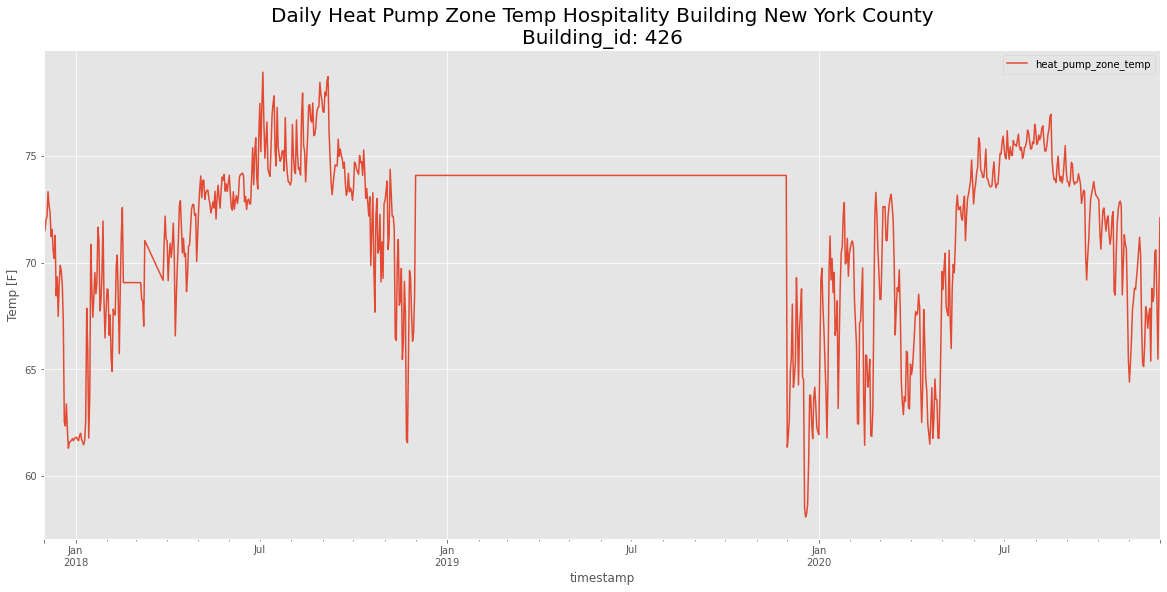

In [42]:
hp_zone_temp_time_series_new_york_bdg.plot()
plt.title('Daily Heat Pump Zone Temp Hospitality Building New York County\nBuilding_id: 426', size=20)
plt.ylabel('Temp [F]')
plt.show()

In [43]:
co2_all = pd.merge(co2_inside_time_series_new_york_bdg, co2_outside_time_series_new_york_bdg, how='outer', on='timestamp')
co2_all
timeseries_all_426 = pd.merge(co2_all, hp_zone_temp_time_series_new_york_bdg, how='outer', on='timestamp')
timeseries_all_426.isnull().sum()

co2_inside             0
co2_outside            0
heat_pump_zone_temp    0
dtype: int64

In [44]:
timeseries_all_426

,co2_inside,co2_outside,heat_pump_zone_temp
timestamp,,,
2017-12-01 00:00:00+00:00,670.899079,12.006053,72.170658
2017-12-02 00:00:00+00:00,756.156875,11.258750,71.486354
2017-12-03 00:00:00+00:00,780.502813,10.991979,71.994271
2017-12-04 00:00:00+00:00,746.925625,11.023333,72.161979
2017-12-05 00:00:00+00:00,653.696875,11.592813,73.316563
...,...,...,...
2020-11-27 00:00:00+00:00,434.039375,212.894271,70.599167
2020-11-28 00:00:00+00:00,419.540104,223.240521,68.348333
2020-11-29 00:00:00+00:00,418.569271,230.319479,65.477187


### `Export combined CSV`

In [45]:
# buildinlg 426
timeseries_all_426.to_csv('daily_co2_temp_hospitality_426_new_york.csv')